## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

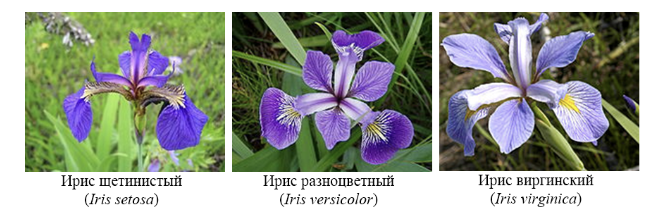

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.
Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

Это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [8]:
iris_df = pd.DataFrame(iris.data)

In [9]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_df.columns = iris.feature_names# Делаем имена колонок такие же, как имена переменных:
iris_df['target'] = iris.target# Добавляем целевые переменные 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])# Добавляем столбец с сортами: 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.shape

(150, 6)

In [12]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   name               150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

In [16]:
iris_df.hist(figsize = (15,10), bins = 50);

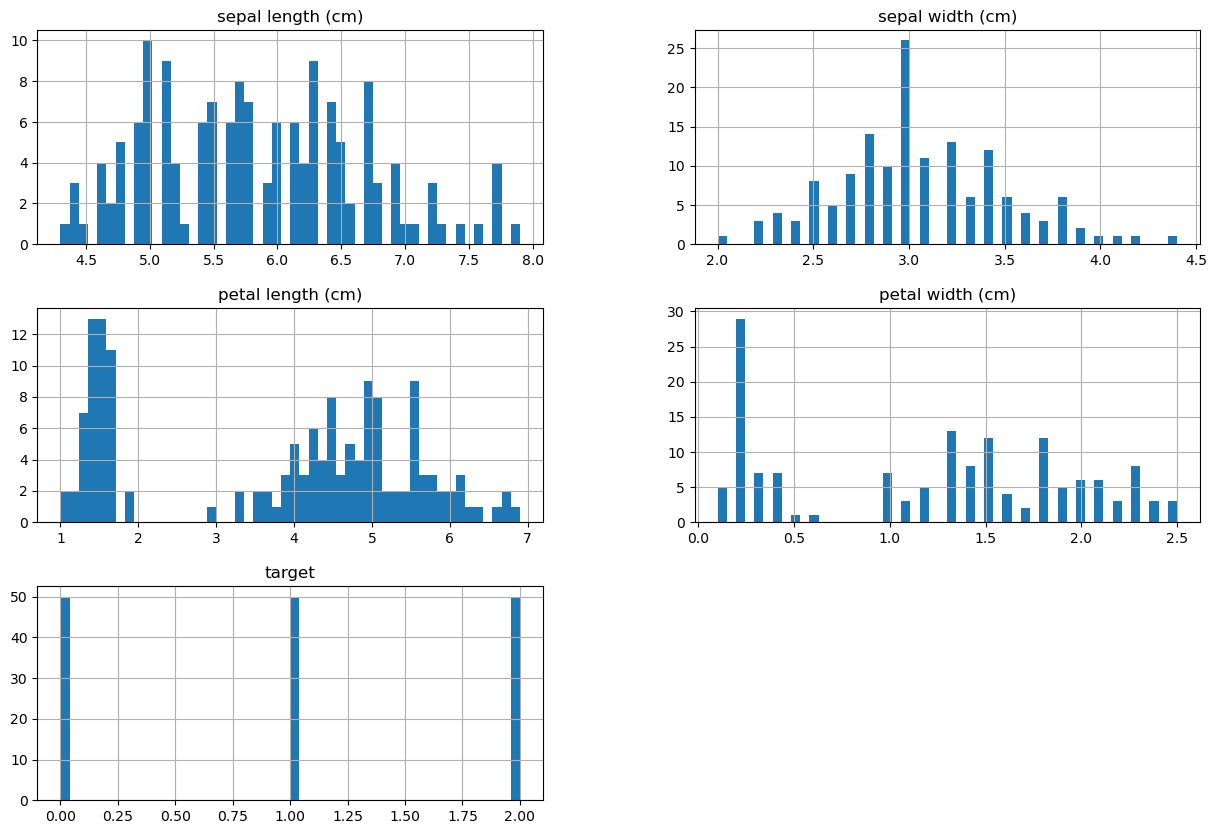

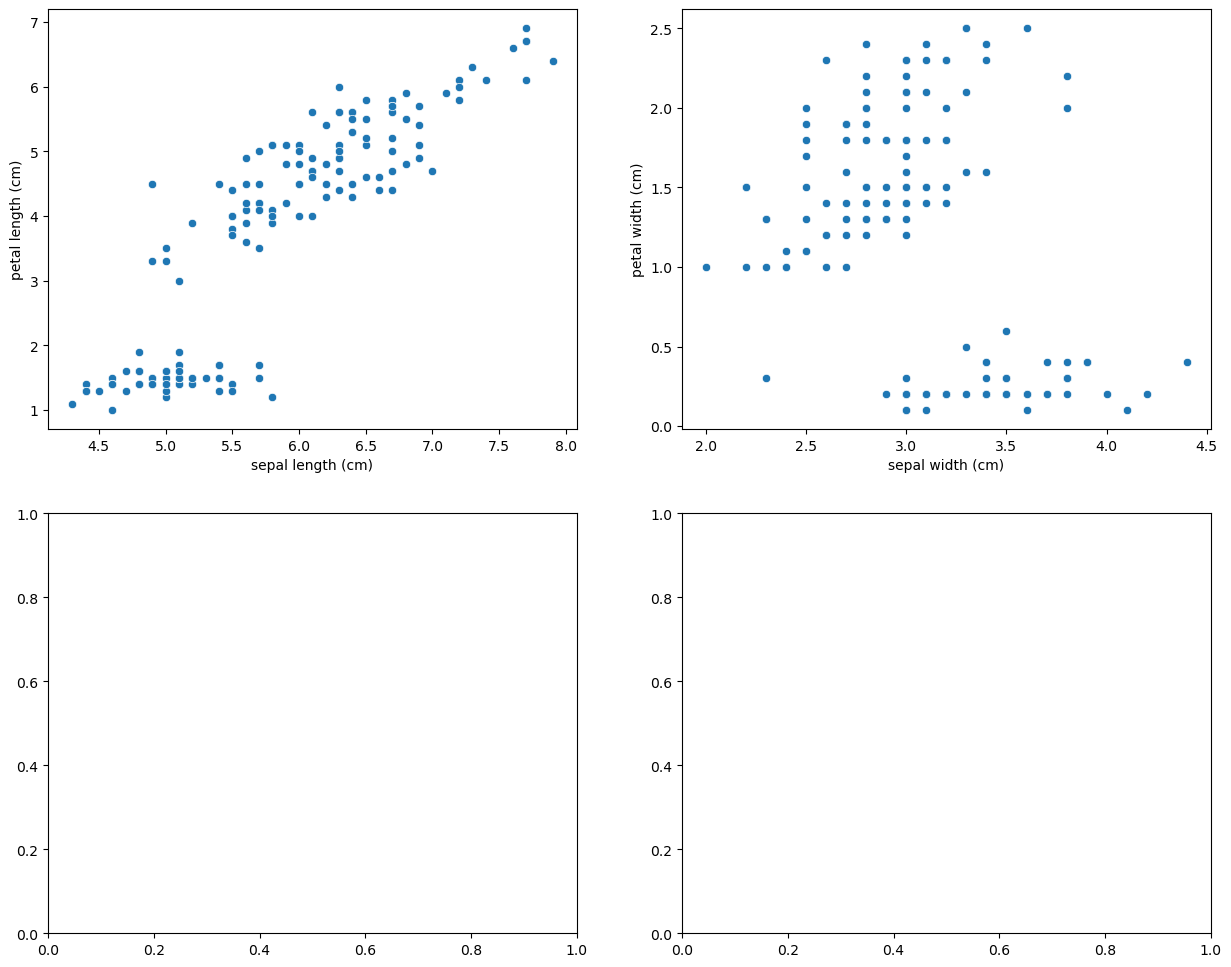

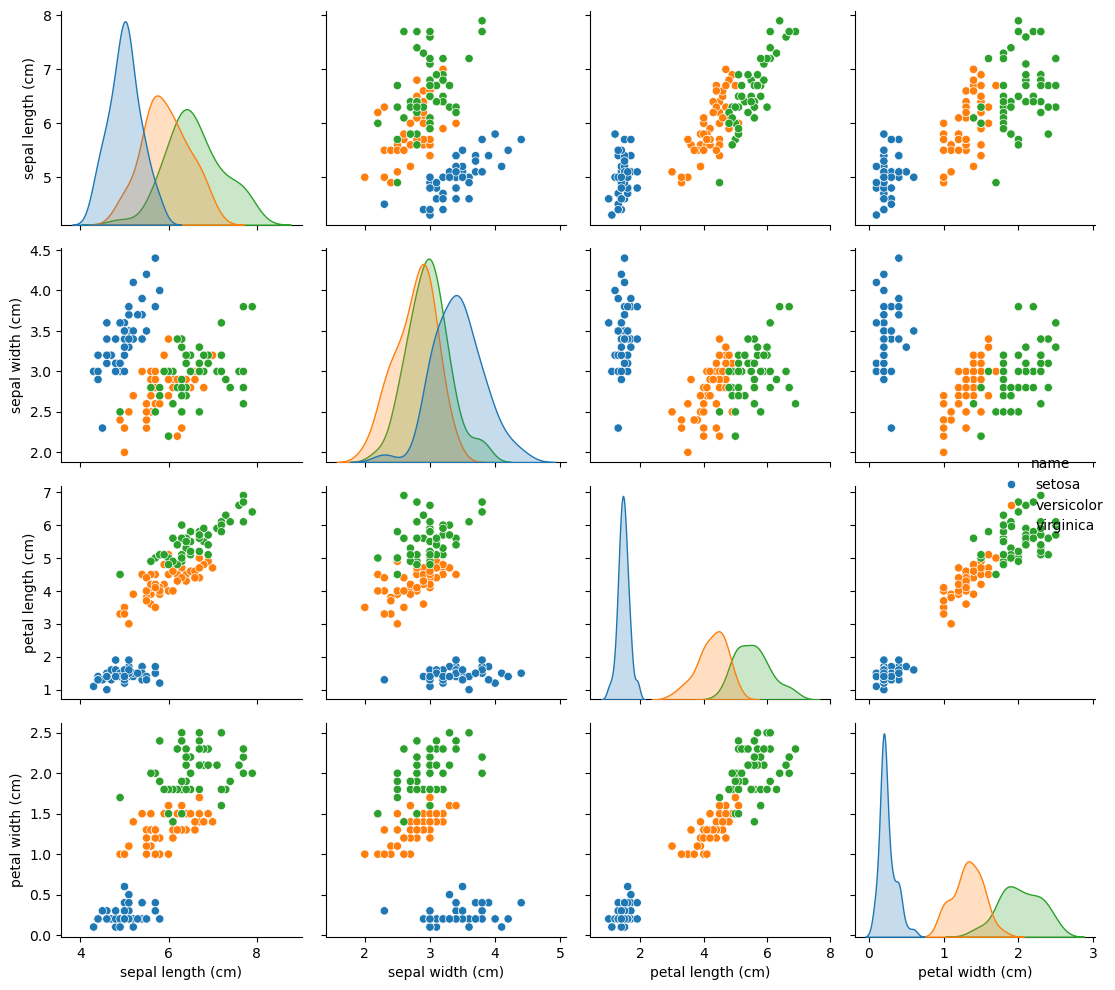

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Диаграммы рассеяния для разных пар признаков
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='petal length (cm)',  ax=axes[0,0])
sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal width (cm)',  ax=axes[0,1])
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')
plt.tight_layout()
plt.show()

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы компактно.

In [18]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


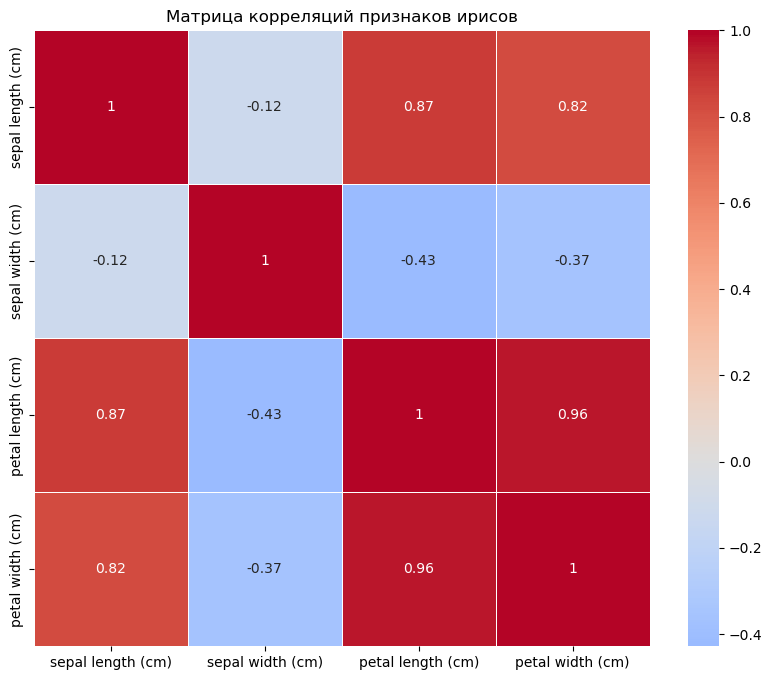

In [19]:
plt.figure(figsize=(10, 8))
numeric_columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
correlation_matrix = iris_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Матрица корреляций признаков ирисов')
plt.show()

Видим, что между «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение классификатора

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = iris_df[numeric_columns]
y = iris_df['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,  
    random_state=42, 
    stratify=y      
) # Разделяем данные на обучающую и тестовую выборки.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
y_pred = knn.predict(X_test) #предсказания на тестовых данных
y_pred

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

In [25]:
#еще способ для вычисления метрики
from sklearn.metrics import accuracy_score
basic_accuracy=accuracy_score(y_test, y_pred)
basic_accuracy #сравниваем предсказания с истинными метками

0.9473684210526315

In [26]:
#Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

Обучающая выборка: 112 samples
Тестовая выборка: 38 samples


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Метрики многоклассовой классификации

1) Микро-усреднение (micro-averaging) является эквивалентом accuracy и подходит __при сбалансированных классах__. Элементы consufion matrix усредняются между бинарными прогнозами для каждого класса, после чего метрики рассчитываются на полученной матрице. На примере Precision и Recall это выглядит следующим образом:

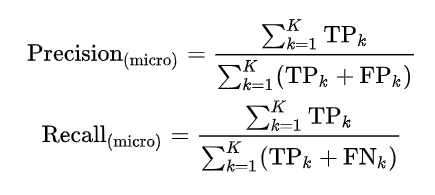

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9473684210526315
0.9473684210526315
0.9473684210526315


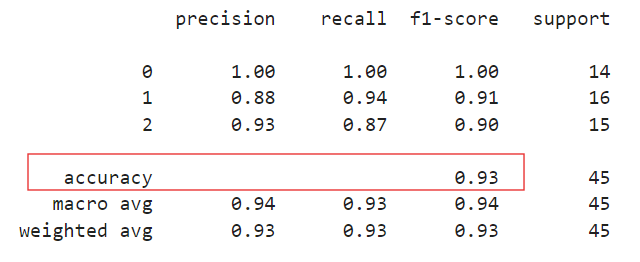

2) Макро-усреднение (macro-averaging) представляет собой среднее арифметическое подсчитанной метрики для каждого класса и используется __при дисбалансе классов, когда важен каждый класс__. В таком случае все классы учитываются равномерно независимо от их размера.

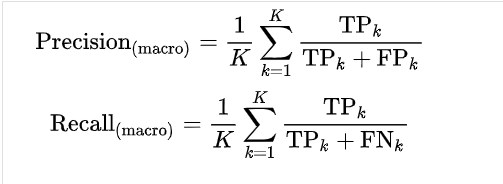

In [30]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9555555555555556
0.9487179487179488
0.9484126984126985


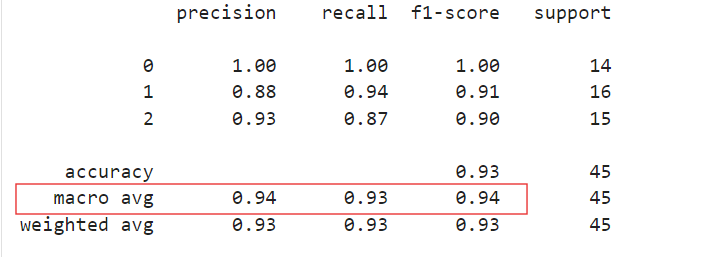

3) Взвешенное усреднение (weighted averaging) рассчитывается как взвешенное среднее и также применяется в случае __дисбаланса классов__, но только когда важность класса учитывается в зависимости от количества объектов с таким классом, то есть __когда важны наибольшие классы__. При таком подходе важность каждого класса учитывается с присвоением им весов. Вес класса w_k может устанавливаться по-разному, например, как доля примеров этого класса в обучающей выборке:

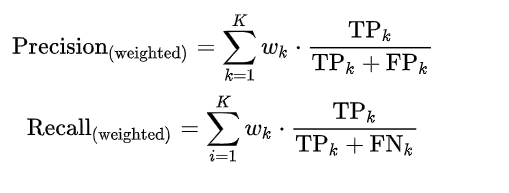

In [31]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9543859649122807
0.9473684210526315
0.9470551378446114


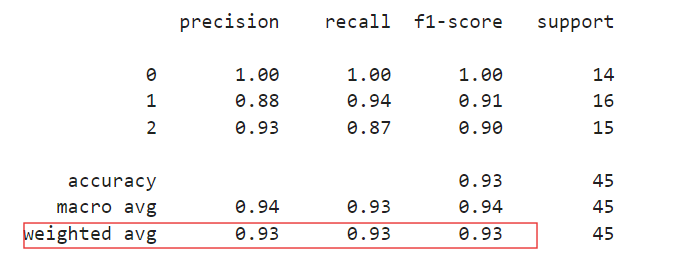

### Кроссвалидация

__Кросс-валидация (перекрестная проверка)__ — это метод оценки производительности модели машинного обучения, который позволяет более эффективно использовать данные для обучения и тестирования. Вместо одного разделения на обучающую и тестовую выборки, мы делаем несколько таких разделений и усредняем результаты.

##### Как работает кросс-валидация

Один из самых распространенных методов — k-блочная кросс-валидация (k-fold cross-validation).

Шаги k-блочной кросс-валидации:
- __Разбиение данных:__ Исходный набор данных случайным образом разбивается на k частей (фолдов) примерно одинакового размера. Обычно k выбирают 5 или 10.

- __Обучение и валидация:__ Модель обучается k раз. Каждый раз:
1. Один из k фолдов используется в качестве тестовой выборки (валидационной).
2. Оставшиеся k-1 фолдов объединяются в обучающую выборку.
3. Модель обучается на обучающей выборке и оценивается на тестовой.
   
- __Сбор метрик:__ После каждого из k запусков вычисляется метрика качества (например, точность). В итоге получаем k значений метрики.

- __Усреднение:__  Вычисляется среднее значение и стандартное отклонение по k метрикам. Это дает итоговую оценку производительности модели.

##### Стратифицированная кросс-валидация
Для задач классификации часто используют стратифицированную кросс-валидацию. Она сохраняет распределение классов в каждом фолде таким же, как и в исходном наборе данных. Это особенно важно, если данные несбалансированы.

In [32]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
                                                    

In [33]:
y = iris_df['target']

In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [35]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score:  0.96


### Настройка гиперпараметров

__GridSearch (сеточный поиск)__ - это метод подбора оптимальных гиперпараметров модели машинного обучения путем полного перебора всех возможных комбинаций.

Как работает GridSearch?

- Задаем сетку гиперпараметров: для каждого гиперпараметра указываем список возможных значений.

- Создаем все возможные комбинации этих гиперпараметров.

- Для каждой комбинации:

1. Обучаем модель на обучающих данных.

2. Оцениваем модель с помощью кросс-валидации.

- Выбираем комбинацию, которая показала наилучший результат.

- Обучаем финальную модель на всем обучающем наборе с лучшими найденными гиперпараметрами.

In [50]:
param_grid = {
    'n_neighbors': range(1, 16, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    knn, param_grid, cv=5, scoring='accuracy', 
    n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 16, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [56]:
best_knn=grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred_best)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

Точность на тестовых данных: 0.9737


## Обучение других моделей

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [58]:
# Обучение модели: Случайный лес
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [59]:
# Обучение модели: SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

In [60]:
print(f"Точность Случайного леса: {acc_rf:.4f}")
print(f"Точность K-ближайших соседей (KNN): {test_accuracy:.4f}")
print(f"Точность SVM: {acc_svm:.4f}")

Точность Случайного леса: 0.9211
Точность K-ближайших соседей (KNN): 0.9737
Точность SVM: 1.0000


In [61]:
iris_results = {
        'Модель': ['К-ближайших соседей (KNN)', 'Случайный лес', 'SVM'], 
        'Точность (Accuracy)': [test_accuracy, acc_rf, acc_svm]
    }

In [62]:
iris_results_df = pd.DataFrame(iris_results).set_index('Модель')
print("Сравнение 4 моделей для классификации Ирисов")
print(iris_results_df)

Сравнение 4 моделей для классификации Ирисов
                           Точность (Accuracy)
Модель                                        
К-ближайших соседей (KNN)             0.973684
Случайный лес                         0.921053
SVM                                   1.000000


In [63]:
best_model_name = iris_results_df['Точность (Accuracy)'].idxmax()
best_accuracy = iris_results_df.loc[best_model_name, 'Точность (Accuracy)']
print(f"Лучшая модель: {best_model_name} с точностью {best_accuracy:.4f}")

Лучшая модель: SVM с точностью 1.0000


In [64]:
print(f"\n Детальный анализ лучшей модели ({best_model_name})")
    
if best_model_name == 'К-ближайших соседей (KNN)':
    best_predictions = y_pred_best

elif best_model_name == 'Случайный лес':
    best_predictions = y_pred_rf
else: 
    best_predictions = y_pred_svm

print(f"\nClassification Report для {best_model_name}")
print(classification_report(y_test, best_predictions, target_names=iris.target_names))


 Детальный анализ лучшей модели (SVM)

Classification Report для SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [65]:
print("CV mean:", np.mean( 
        cross_val_score(  # Запускаем кросс-валидацию
            svm_model,    
            X_train,      # Обучающие данные
            y_train,      # Метки обучающих данных
            cv=3          # 3 разбиения
        )
    )
)

CV mean: 0.9642010431484116


In [66]:
print("-СРАВНЕНИЕ РЕЗУЛЬТАТОВ-")

test_accuracy = 1.0000  
cv_mean = 0.9642

print(f"Тестовая точность: {test_accuracy:.4f}")
print(f"CV средняя точность: {cv_mean:.4f}")
print(f"Разница: {test_accuracy - cv_mean:.4f}")

-СРАВНЕНИЕ РЕЗУЛЬТАТОВ-
Тестовая точность: 1.0000
CV средняя точность: 0.9642
Разница: 0.0358


Модель SVM показывает высокую точность классификации на наборе данных Iris. При проверке методом кросс-валидации (3 разбиения) получили среднюю точность 96.42%, что говорит о хорошей обобщающей способности модели. Результат 100% на тестовой выборке может быть из-за высокой разделимости классов в данном разбиении данных.